In [54]:
# Importation des modules utiles à la réalisation du travail

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [44]:
# Définition de l'espace de travail

import os
os.chdir(r"C:\Users\victo\Documents\DataScientest\Data Analyst\1000 - Travail de Groupe\Workspace")

In [45]:
# Création du DataFrame avec les données allant jusqu'à 2019

vgsales = pd.read_csv("vgsales-12-4-2019.csv")
vgsales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [46]:
# Description du DataFrame

vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [47]:
# Création d'un nouveau DataFrame contenant le nom du jeu, le genre et le Critic Score
vgscore = vgsales[['Name', 'Genre', 'Critic_Score', 'Publisher', 'Developer', 'Year']].copy()
vgscore.dropna(subset = ['Critic_Score'], inplace = True)
vgscore.dropna(subset = ['Year'], inplace = True)
vgscore['Year'] = vgscore['Year'].astype(int)

vgscore.isna().sum()

Name            0
Genre           0
Critic_Score    0
Publisher       0
Developer       0
Year            0
dtype: int64

In [56]:
print('Nous avons', len(vgscore), 'jeux ayant une note de la critique dans ce jeu de données.')

Nous avons 6532 jeux ayant une note de la critique dans ce jeu de données.


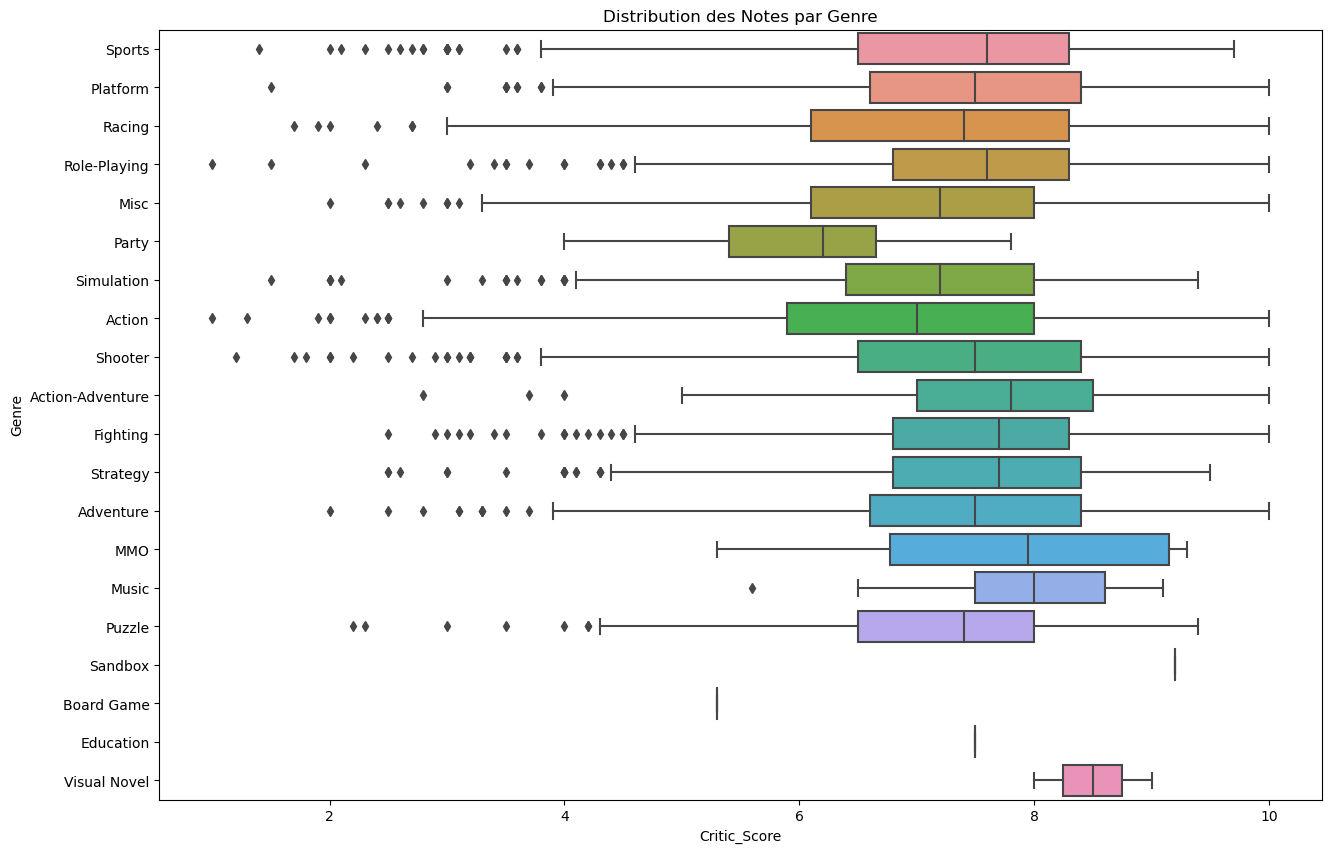

In [48]:
# Réalisation du graphique de distribution des notes des critiques par genre

plt.figure(figsize = (15, 10))
sns.boxplot(y = 'Genre', x = 'Critic_Score', data = vgscore)
plt.title('Distribution des Notes par Genre')
plt.show()

In [ ]:
# Commentaire sur les résultats:
# La médiane des notes de la critique reçues par chacun des genres se situe génalement entre 7/10 et 8/10.
# On observe que le genre "Party Game" est celui qui reçoit le moins de notes au dessus de 6/10, 50% des notes reçues se situant en dessous.
# Les deux genre avec les moins bonnes notes observées sont "Role-Playing" et "Action"
# Le genre ayant la médiane la plus élevée est "Visual Novel". C'est aussi celui avec la distribution la plus concentrée.
# On pourrait potentiellement l'expliquer par le caractère extrêmement niche de ce genre ainsi que la simplicité de ces mécaniques.
# Il faudrait récolter plus d'information sur 

In [49]:
# Ajout d'un split des données par année

fig = px.box(vgscore, x = 'Genre', y = 'Critic_Score', color = 'Genre', animation_frame = 'Year')
fig.show()

In [51]:
# Création de deux nouveaux DataFrames contenant les notes moyennes obtenues par les éditeurs et développeurs

vgscore_publisher = pd.DataFrame(vgscore.groupby('Publisher')['Critic_Score'].mean().reset_index())
vgscore_developer = pd.DataFrame(vgscore.groupby('Developer')['Critic_Score'].mean().reset_index())

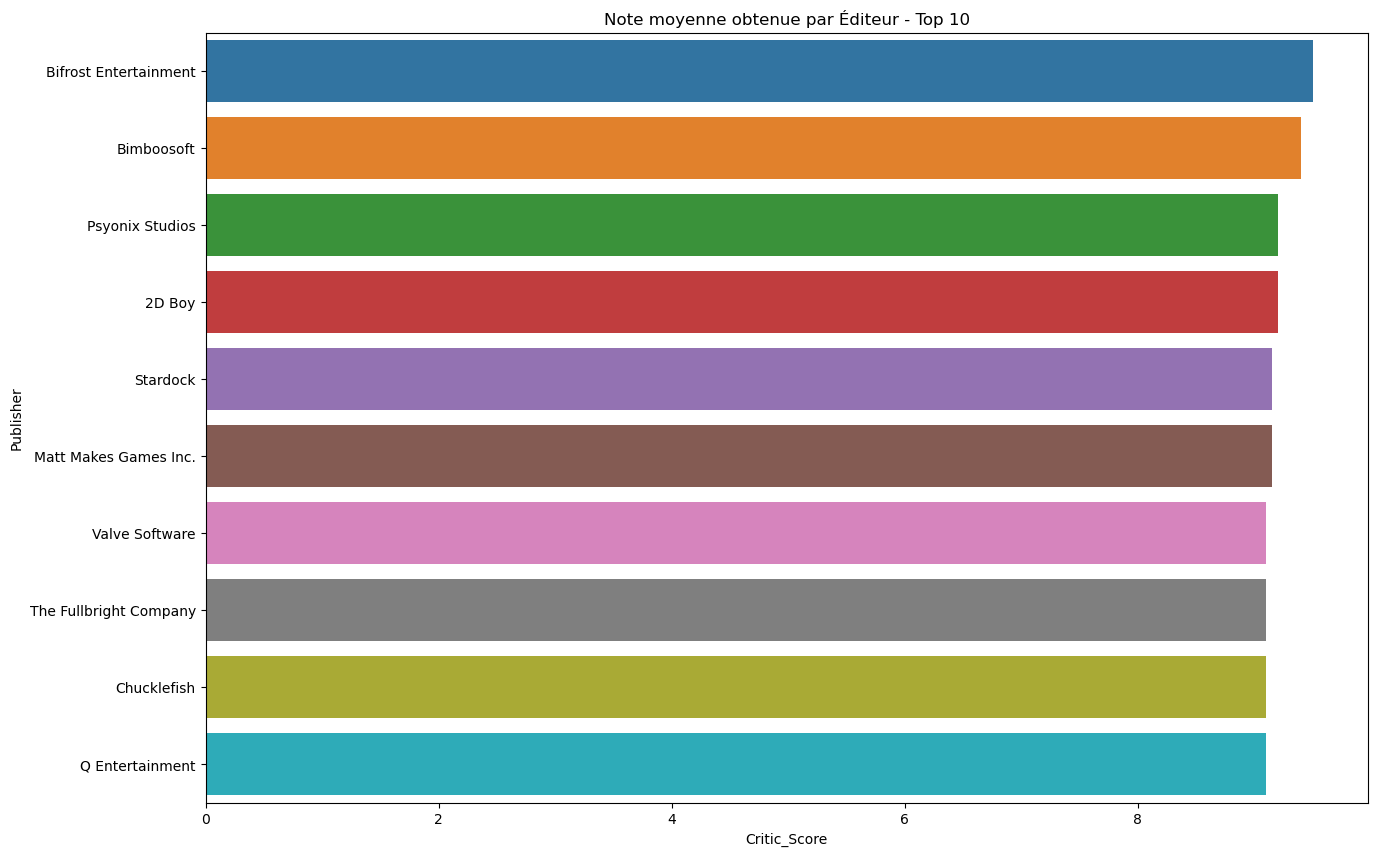

In [52]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Critic_Score', y = 'Publisher', data = vgscore_publisher.sort_values(by = 'Critic_Score', ascending = False).head(10))
plt.title('Note moyenne obtenue par Éditeur - Top 10')
plt.show()

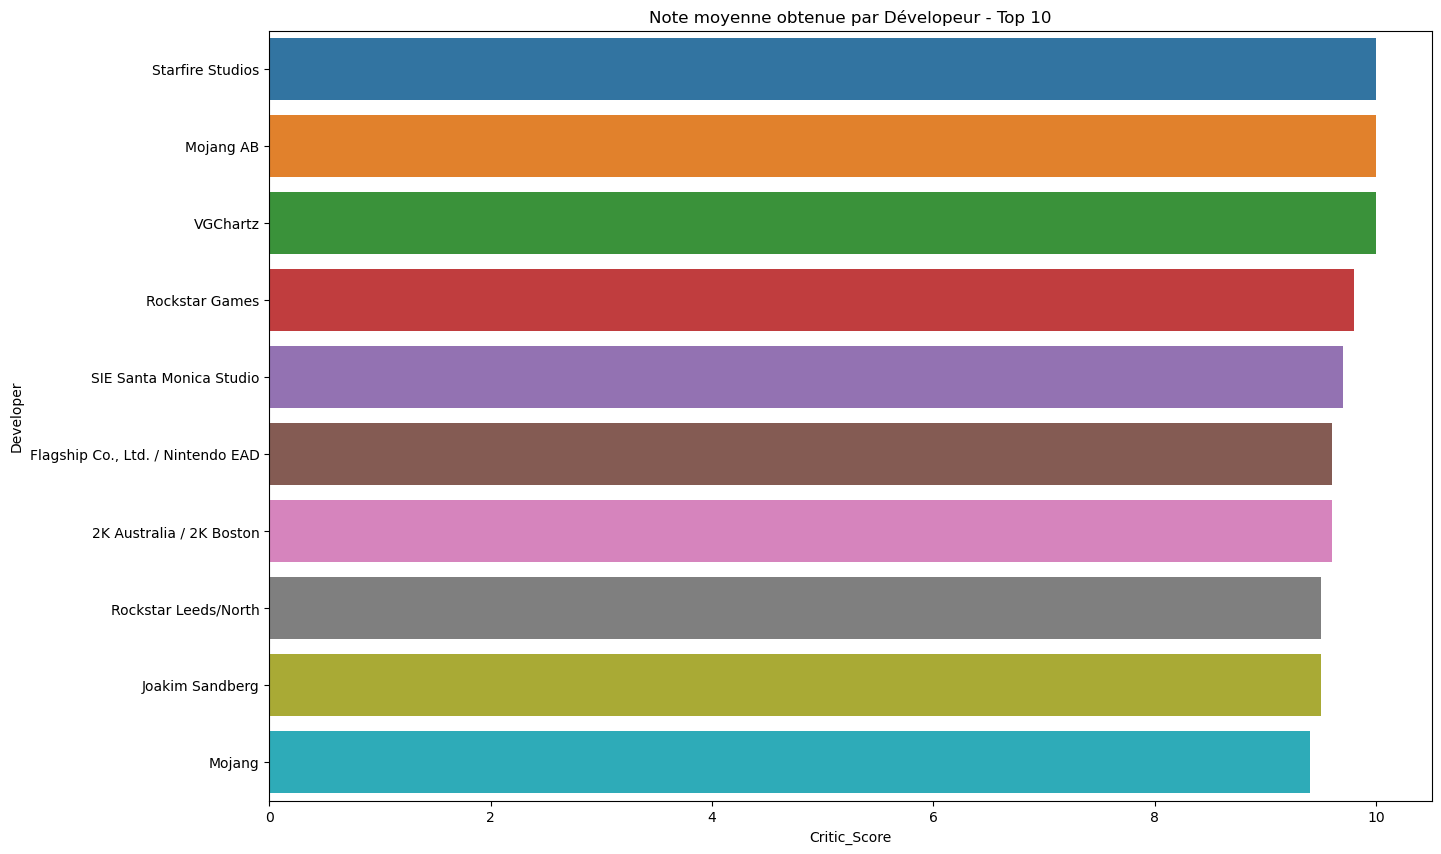

In [53]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Critic_Score', y = 'Developer', data = vgscore_developer.sort_values(by = 'Critic_Score', ascending = False).head(10))
plt.title('Note moyenne obtenue par Dévelopeur - Top 10')
plt.show()